In [3]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys
sys.path.append("../")

In [2]:
import glob
import joblib
import pandas as pd
#from pathlib import Path
import matplotlib.pyplot as plt

from utils import utils as u
from utils import phone_info as ph_i 
from utils import plots as plots
from umap import UMAP
from sklearn.metrics import silhouette_score, silhouette_samples

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

ModuleNotFoundError: No module named 'utils'

In [ ]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/study_phonemes_contentvec/data/GTSinger_ES'
feat_paths = glob.glob(f'{root}/feat_layer_2/*.csv')
text_grid_paths = glob.glob(f'{root}/TextGrid/*.TextGrid')

In [7]:
layers_dict = {
    2: 'feat_layer_2',
    5: 'feat_layer_5',
    7: 'feat_layer_7',
    9: 'feat_layer_9',
    12: 'feat'} 

In [ ]:
df_anotated_all = u.make_anotated_feat_df(feat_paths, 
                                          text_grid_paths, 
                                          tp_algn = 'text_grid',
                                          dataset = 'gt')

df_info = df_anotated_all['song'].str.split('-', expand=True)
df_info.columns = ['speaker', 'book', 'line']
df_anotated_all = pd.concat([df_anotated_all, df_info], axis = 1)

In [18]:
c1 = df_anotated_all['phone_base'] != '<AP>'

drop_cols = ['phone_base', 'song', 'speaker', 'book', 'line']

df_no_sil = df_anotated_all[c1].reset_index(drop = True)
X_no_sil = df_no_sil.drop(columns=drop_cols).values

In [19]:
reducer = UMAP(n_components=2, 
               n_neighbors=100, 
               min_dist=0.1, 
               random_state=42)
reducer.fit(X_no_sil)

X_2d = reducer.transform(X_no_sil)

In [20]:
df_2d = pd.DataFrame(data = X_2d, columns = ['x', 'y'])
df_2d_an = pd.concat([df_2d,df_no_sil], axis = 1)

In [21]:
my_phones = list(df_anotated_all['phone_base'].value_counts().to_dict().keys())[0:10]
my_phones

['e', 'a', 'o', '<AP>', 'i', 's', 'ɾ', '<SP>', 'n', 'u']

Making a 2d plot


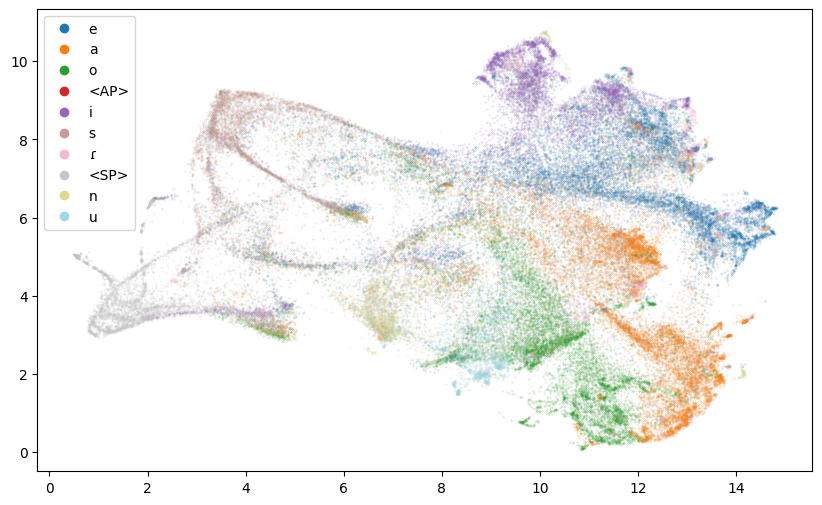

In [24]:
#df_bass = df_2d_an[df_2d_an['speaker'] == 'BASS']
plots.make_tagged_LS_plot(df_2d_an,
                phones = my_phones,
                alpha = 0.3, 
                s = 0.1, 
                show_global = True,
                add_legend = True,
                xlim = None,
                save_fig = False)

-------- Working on layer 2
-------- umap
Training UMAP with parameters n_components : 2, n_neighbors 100, min_dist : 0.1
Applying dimensional reduction
Reduced to 2 dimensions
-------- plot
Making a 2d plot
-------- silhouette
-------- o -------- 

-------- Working on layer 5
-------- umap
Training UMAP with parameters n_components : 2, n_neighbors 100, min_dist : 0.1
Applying dimensional reduction
Reduced to 2 dimensions
-------- plot
Making a 2d plot
-------- silhouette
-------- o -------- 

-------- Working on layer 7
-------- umap
Training UMAP with parameters n_components : 2, n_neighbors 100, min_dist : 0.1
Applying dimensional reduction
Reduced to 2 dimensions
-------- plot
Making a 2d plot
-------- silhouette
-------- o -------- 

-------- Working on layer 9
-------- umap
Training UMAP with parameters n_components : 2, n_neighbors 100, min_dist : 0.1
Applying dimensional reduction
Reduced to 2 dimensions
-------- plot
Making a 2d plot
-------- silhouette
-------- o -------- 



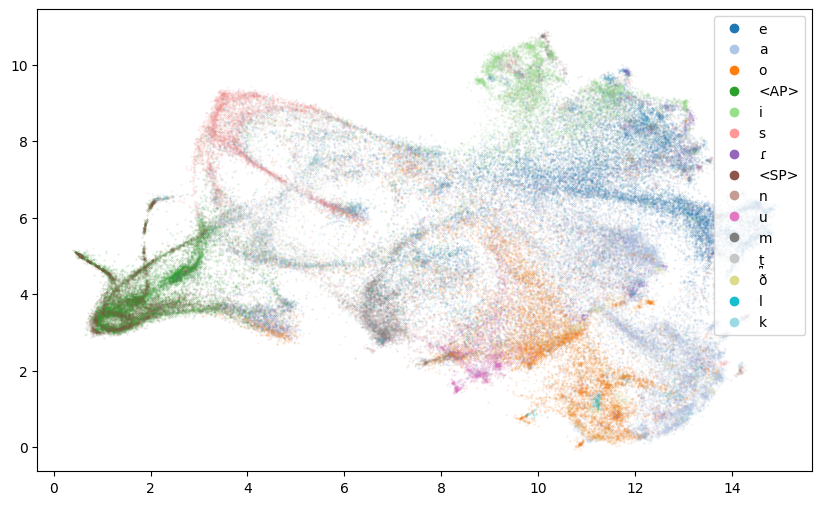

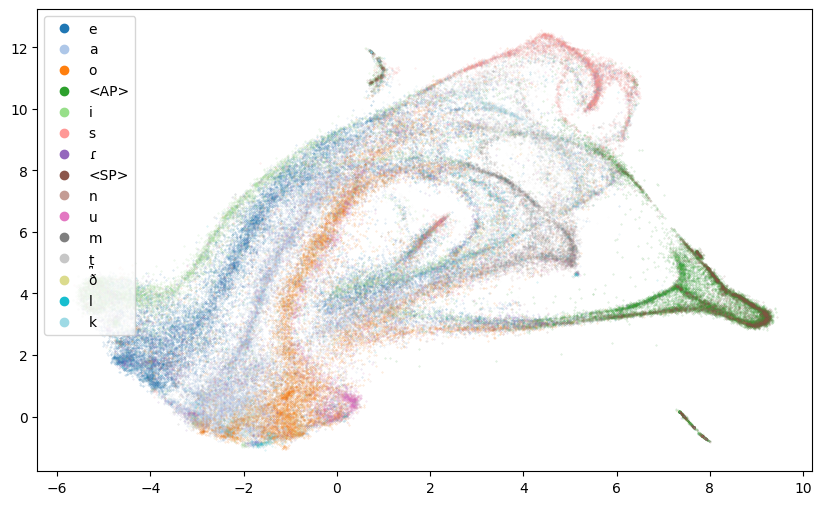

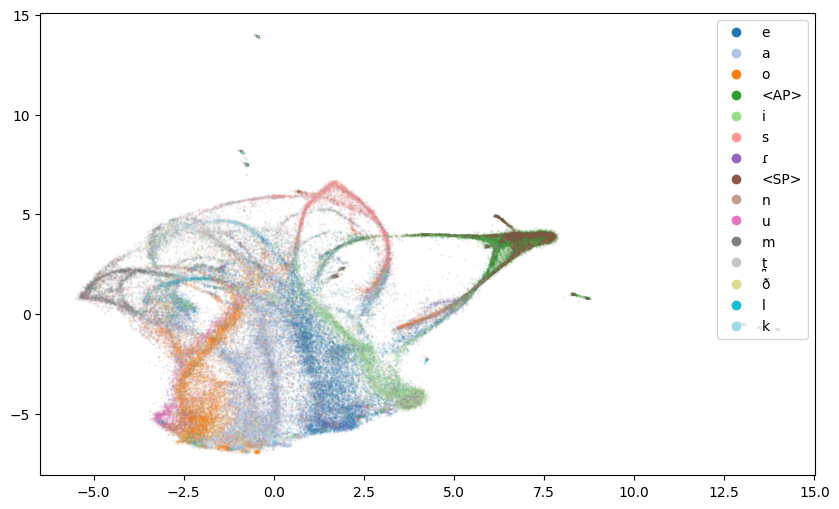

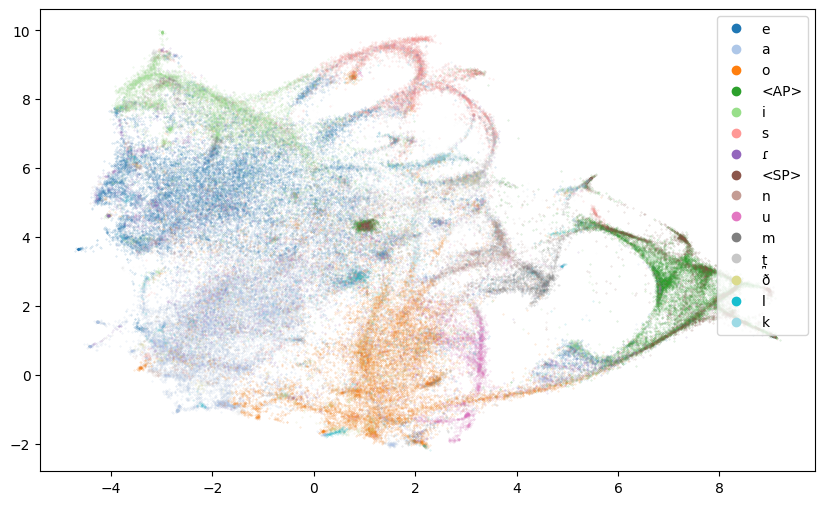

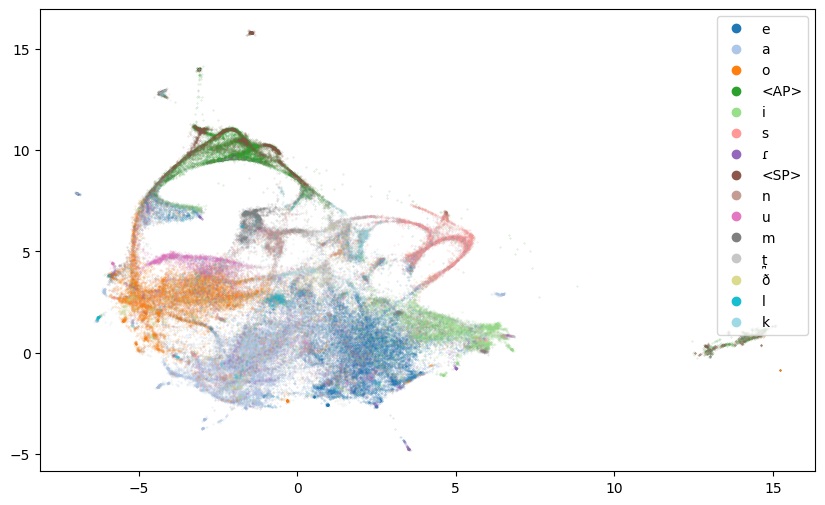

In [10]:
silhouette_dict = {}

for layer in layers_dict.keys():

    print(f'-------- Working on layer {layer}')
    feat_paths = glob.glob(f'{root}/{layers_dict[layer]}/*.csv')
    #df_anotated = u.make_anotated_feat_df(feat_paths, lab_paths)

    df_anotated = u.make_anotated_feat_df(feat_paths, 
                                          text_grid_paths, 
                                          tp_algn = 'text_grid',
                                          dataset = 'gt')
    # df_info = df_anotated['song'].str.split('-', expand=True)
    # df_info.columns = ['speaker', 'book', 'line']
    # df_anotated = pd.concat([df_anotated, df_info], axis = 1)
    # c1 = df_anotated_all['phone_base'] != '<AP>'
    # drop_cols = ['phone_base', 'song', 'speaker', 'book', 'line']
    # df_no_sil = df_anotated_all[c1].reset_index(drop = True)
    # X_no_sil = df_no_sil.drop(columns=drop_cols).values

    ### umap
    print(f'-------- umap')
    umap2 = u.train_umap(
        df_anotated,
        exclude_phones = ['<AP>'],
        n_components=2, 
        n_neighbors=100, 
        min_dist=0.1,
        save_model = False,
        folder = None)
    
    df_proj_anotated = u.make_proj_anotated_feat_df(df_anotated, 
                                                    umap2,
                                                    save_df = False,
                                                    folder = None)
    
    ### plots
    print(f'-------- plot')
    #unique_phones = [k for k in df_anotated['phone_base'].value_counts().keys() if k != '<AP>']
    my_phones = list(df_anotated['phone_base'].value_counts().to_dict().keys())[0:15]
    plots.make_tagged_LS_plot(df_proj_anotated,
            phones = my_phones,
            alpha = 0.25, 
            s = 0.1,
            show_global=True)
    plt.savefig(f'LS_GTSinger_ES_layer_{layer}')
    
    ### silhouettes
    print(f'-------- silhouette')
    X1 = df_anotated.drop(columns = ['phone_base', 'song']).values
    y1 = df_anotated['phone_base'].values
    sil_score = silhouette_score(X1, y1, metric='cosine')

    silhouette_dict[layer] = sil_score

    print(f'-------- o -------- \n')

In [ ]:
silhouette_dict_songs = {
2: 0.026745177184901082,
5: 0.024168539539559754,
7: 0.05940969570897242,
9: 0.05940969570897242,
12: 0.061644733461769984}

In [11]:
silhouette_dict

{2: -0.02945848176633325,
 5: -0.01429597989966786,
 7: -0.008251934369248539,
 9: -0.007227003828287507,
 12: -0.013430340804722893}

# MI 

In [6]:
feat_paths = glob.glob(f'{root}/feat/*.csv')
df_anotated = u.make_anotated_feat_df(feat_paths, lab_paths)

In [27]:
df_anotated['phone_base'].unique()

array(['SP', 'm', 't', 'u', 's', 'a', 'p', 'AP', 'n', 'h', 'y', 'o', 'r',
       'i', 'k', 'e', 'd', 'l', 'sh', 'B', 'jh', 'b', '3', 'ch', 'w',
       'll', 'rr', 'D', 'G', '0', 'f', 'cl', 'z', 'N', 'x', 'g', 'Y'],
      dtype=object)

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import mutual_info_score
import numpy as np

In [15]:
K = 50

In [16]:
mi_dict = {}
for layer in layers_dict.keys():
    print(f'-------- Working on layer {layer}')
    feat_paths = glob.glob(f'{root}/{layers_dict[layer]}/*.csv')
    #df_anotated = u.make_anotated_feat_df(feat_paths, lab_paths)
    df_anotated = u.make_anotated_feat_df(feat_paths, 
                                          text_grid_paths, 
                                          tp_algn = 'text_grid',
                                          dataset = 'gt')

    c1 = df_anotated['phone_base'] != '<AP>'
    c2 = df_anotated['phone_base'] != '<SP>'

    df_filter = df_anotated[c1 & c2]

    ### umap
    print(f'-------- MI')
    X = df_filter.drop(columns = ['phone_base', 'song']).values
    y = df_filter['phone_base'].values

    # Step 1: Cluster the embeddings
    kmeans = KMeans(n_clusters=K, random_state=42)
    cluster_assignments = kmeans.fit_predict(X)

    # Step 2: Compute mutual information with phone labels
    mi = mutual_info_score(y, cluster_assignments)

    print(f"Mutual Information (MI-phone): {mi:.4f}")

    mi_dict[layer] = mi

-------- Working on layer 2
-------- MI
Mutual Information (MI-phone): 0.7322
-------- Working on layer 5
-------- MI
Mutual Information (MI-phone): 0.5994
-------- Working on layer 7
-------- MI
Mutual Information (MI-phone): 0.7031
-------- Working on layer 9
-------- MI
Mutual Information (MI-phone): 0.8694
-------- Working on layer 12
-------- MI
Mutual Information (MI-phone): 0.8411


In [17]:
mi_dict

{2: 0.7321852329801026,
 5: 0.5993830420848154,
 7: 0.703062699508469,
 9: 0.869432194481996,
 12: 0.8410889134807923}

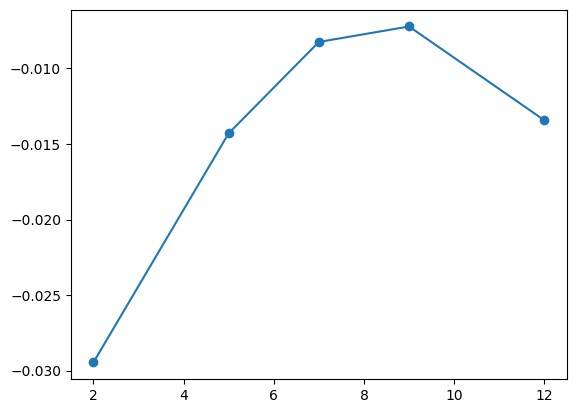

In [18]:
plt.plot(silhouette_dict.keys(), silhouette_dict.values(), '-o')

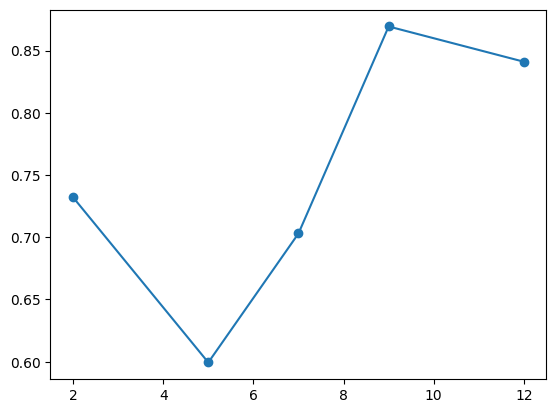

In [19]:
plt.plot(mi_dict.keys(), mi_dict.values(), '-o')